# Deep learing with Keras



## Backend functions

In [1]:
from keras import backend as k

Using TensorFlow backend.


### Check and change backend settings

In [2]:

k.backend()

'tensorflow'

In [4]:
# You can compute simple operations with the backend of keras
k.epsilon()

1e-07

In [6]:
k.set_epsilon('1e-05') # You can change the parameters
k.epsilon()

'1e-05'

### Convert data type

In [0]:
import numpy as np

In [8]:
a=np.array([1,1,1,1],dtype='int32')
a.dtype

dtype('int32')

In [9]:
# Cast to float
b= k.cast_to_floatx(a)
b

array([1., 1., 1., 1.], dtype=float32)

### Numerical Operations

In [10]:
# You can acces to low level operations of tensorflow and make opterations
c=k.random_uniform_variable(shape=(2,3),low=0,high=1)
d=k.random_normal_variable(shape=(2,3), mean=0, scale=1)
e=k.dot(c, k.transpose(d))
e

<tf.Tensor 'MatMul:0' shape=(2, 2) dtype=float32>

In [11]:
soft=k.softmax(b)
soft

<tf.Tensor 'Reshape_1:0' shape=(4,) dtype=float32>

In [13]:
# change the dimensions
g=k.reshape(b,shape=(1,4))
g

<tf.Tensor 'Reshape_3:0' shape=(1, 4) dtype=float32>

### Check Keras Tensors
A **Keras Tensor** is a tensor that was returned by a keras layer oy by Input

In [14]:
k_var=k.placeholder(shape=(1,1))
k.is_keras_tensor(k_var) # A variable indirectly created outside of keras is not a Keras tensor

False

In [15]:
keras_var=k.variable(e)
k.is_keras_tensor(keras_var) # A variable created with keras backend it's not a keras tensor

False

In [16]:
from keras import Input
keras_input=Input([10])
k.is_keras_tensor(keras_input)

True

### Evaluate Data

In [17]:
k_var=k.variable(np.array([[1,2],[3,4]]))
k.eval(k_var)

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [18]:
k.count_params(k_var)

4

In [19]:
k.get_value(k_var)

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [20]:
k.get_variable_shape(k_var)

(2, 2)

### Reset graph 

In [0]:
k.clear_session()

## Design and compile Keras model

In [0]:
import keras 
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense,Dropout, BatchNormalization
from keras.layers import LSTM, Embedding, Input, merge, Bidirectional
from keras.preprocessing import sequence
from keras import optimizers
from keras.datasets import imdb

import time 
import os

In [0]:
# Parameters
max_features=2000
max_len=200

batch_size=32
epochs=3
n_classes=2

embedding_dim=128
lstm_layer_dim=64
n_val_samples=5000
learning_rate=0.01
decay=learning_rate/epochs

### Load data

In [24]:
# Load data
(x_train, y_train), (x_test,y_test) =imdb.load_data()


# Split the data to have validations sets
x_train=x_train[:-n_val_samples]
y_train=y_train[:-n_val_samples]
x_val=x_train[-n_val_samples:]
y_val=y_train[-n_val_samples:]

print('x_train Shape: ', x_train.shape)
print('y_train Shape: ', y_train.shape)
print('x_val Shape: ', x_val.shape)
print('y_val Shape: ', y_val.shape)
print('x_test Shape: ', x_test.shape)
print('y_test Shape: ', y_test.shape)


x_train Shape:  (20000,)
y_train Shape:  (20000,)
x_val Shape:  (5000,)
y_val Shape:  (5000,)
x_test Shape:  (25000,)
y_test Shape:  (25000,)


### Process input data
Next, we'll turn the input vectors into (0,1)-vectors. For example, if the pre-processed vector contains the number 14, then in the processed vector, the 14th entry will be 1.

Also, we need to truncate and pad the input sequences so that they are all the same length for modeling. The model will learn the zero values carry no information so indeed the sequences are not the same length in terms of content, but same length vectors is required to perform the computation in Keras.

In [27]:
# Padding and convert to one hot encoding vectors
x_train=sequence.pad_sequences(x_train,maxlen=max_len)
x_test=sequence.pad_sequences(x_test,maxlen=max_len)
x_val=sequence.pad_sequences(x_val,maxlen=max_len)

print('After Padding x_train Shape: ', x_train.shape)
print('After padding x_test Shape: ', x_test.shape)
print('After padding x_val Shape: ', x_val.shape)

After Padding x_train Shape:  (20000, 200)
After padding x_test Shape:  (25000, 200)
After padding x_val Shape:  (5000, 200)


In [28]:
# one-hot 
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)
y_val = keras.utils.to_categorical(y_val, n_classes)
print('Training set labels size: ' , y_train.shape)
print('Test set labels size: ', y_test.shape)
print('Evaluating set label size: ',y_val.shape)

Training set labels size:  (20000, 2)
Test set labels size:  (25000, 2)
Evaluating set label size:  (5000, 2)


### Build model Architecture
The first layer is the Embedded layer that uses 128 length vectors to represent each word. Then we add batch normalization layer here to normalize the value after embedding for the next layer. The next layer is the Bi-directional LSTM layer with 64 memory units. Then we add a dropout layer to reduce overfitting.

Finally, because this is a classification problem we use a Dense output layer with a single neuron and a softmax activation function to produce the probability of each label('positive' or 'negative') for this problem.

In [17]:
# Sequential Model
model=Sequential()
model.add(Embedding(max_features,embedding_dim,input_length=max_len)) # Word embeddings
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(lstm_layer_dim)))
model.add(Dropout(0.25))
model.add(Dense(2,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 128)          256000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 200, 128)          512       
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 355,586
Trainable params: 355,330
Non-trainable params: 256
_________________________________________________________________


In [18]:
# Functional API
sequence=Input(shape=(max_len,),dtype=np.int32)
embedding=Embedding(max_features,embedding_dim,input_length=max_len)(sequence)
batch_norm=BatchNormalization()(embedding)
bi_lstm=Bidirectional(LSTM(lstm_layer_dim))(batch_norm)
drop_out=Dropout(0.25)(bi_lstm)
preds=Dense(2,activation='softmax')(drop_out)
modelF=Model(sequence,preds)
modelF.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 200, 128)          256000    
_________________________________________________________________
batch_normalization_2 (Batch (None, 200, 128)          512       
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 355,586
Trainable params: 355,330
Non-trainable params: 256
_________________________________________________________________


### Compilation


In [0]:
sgd=optimizers.SGD(lr=learning_rate,decay=decay,momentum=0.9,nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

### Training

In [22]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint(filepath = 'imdb.model_best.hdf5',
                             verbose = 1, 
                             monitor = 'val_acc',
                            save_best_only = True)

model.fit(x_train,y_train,epochs=epochs,verbose=1,batch_size=batch_size,validation_split=0.2,shuffle=True, callbacks=[checkpoint])

Train on 16000 samples, validate on 4000 samples
Epoch 1/3
16000/16000 [==============================] - 490s 31ms/step - loss: 0.6162 - acc: 0.6522 - val_loss: 0.5563 - val_acc: 0.7155

Epoch 00001: val_acc improved from -inf to 0.71550, saving model to imdb.model_best.hdf5
Epoch 2/3
16000/16000 [==============================] - 490s 31ms/step - loss: 0.5577 - acc: 0.7093 - val_loss: 0.5619 - val_acc: 0.6967

Epoch 00002: val_acc did not improve from 0.71550
Epoch 3/3
16000/16000 [==============================] - 489s 31ms/step - loss: 0.5347 - acc: 0.7288 - val_loss: 0.6551 - val_acc: 0.6580

Epoch 00003: val_acc did not improve from 0.71550


### Evaluation


In [29]:
loss,acc=model.evaluate(x_test,y_test,verbose=1,batch_size=batch_size)
print("Test accuracy: %.2f%%"%(acc*100))

25000/25000 [==============================] - 177s 7ms/step
Test accuracy: 65.48%


### Prediction

In [0]:
# Make predictions
predictions=model.predict(x_test[:10])

## Training with Data augmentation

In [1]:
import keras
from keras.datasets import cifar10
from keras import backend as K
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, BatchNormalization
from keras.layers import Dense, Convolution2D, MaxPooling2D, GlobalAveragePooling2D, Flatten
from keras.optimizers import SGD
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set(color_codes = True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


In [0]:
# Parameters of the network
imgRows,imgCols=32,32
num_classes=10
batch_size=64
epochs=10

### Load cifar  10 data

In [3]:
(x_train,y_train), (x_test,y_test) =cifar10.load_data()

print("Training images shape: ",x_train.shape)
print("Training labels shape: ",y_train.shape)
print("Test images shape: ",x_test.shape)
print("Test labels shape: ",y_test.shape)

170500096/170498071 [==============================] - 13s 0us/step
Training images shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 1)
Test images shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

### Plot data

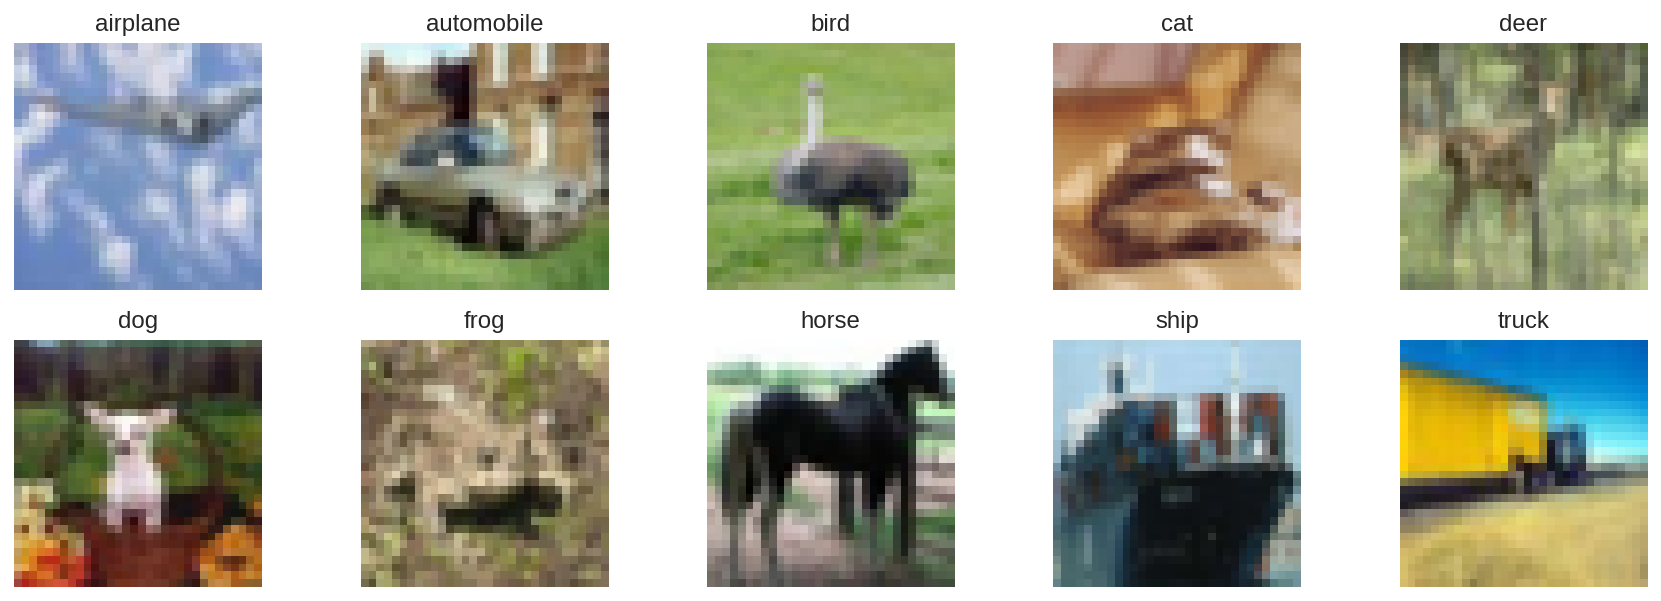

In [17]:
fig=plt.figure(figsize=(15,5))
for i in range(num_classes):
    ax=fig.add_subplot(2,5,1+i,xticks=[],yticks=[])
    idx=np.where(y_train[:]==i)[0]
    features_idx=x_train[idx,::]
    img_num=np.random.randint(features_idx.shape[0])
    
    im=np.transpose(features_idx[img_num,:,:],(0,1,2))
    ax.set_title(class_names[i])
    plt.imshow(im)

plt.show()

### Preprocessing the data

In [21]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, imgRows, imgCols)
    x_test = x_test.reshape(x_test.shape[0], 3, imgRows, imgCols)
    input_shape = (3, imgRows, imgCols)
else:
    x_train = x_train.reshape(x_train.shape[0], imgRows, imgCols, 3)
    x_test = x_test.reshape(x_test.shape[0], imgRows, imgCols, 3)
    input_shape = (imgRows, imgCols, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(np.ravel(y_train), num_classes)
y_test = keras.utils.to_categorical(np.ravel(y_test), num_classes)
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

50000 train samples
10000 test samples
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)


### Data augmentation with ImageDataGenerator

In [0]:
# Data augmentation
datagen= ImageDataGenerator(rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           fill_mode='nearest')

datagen.fit(x_train)

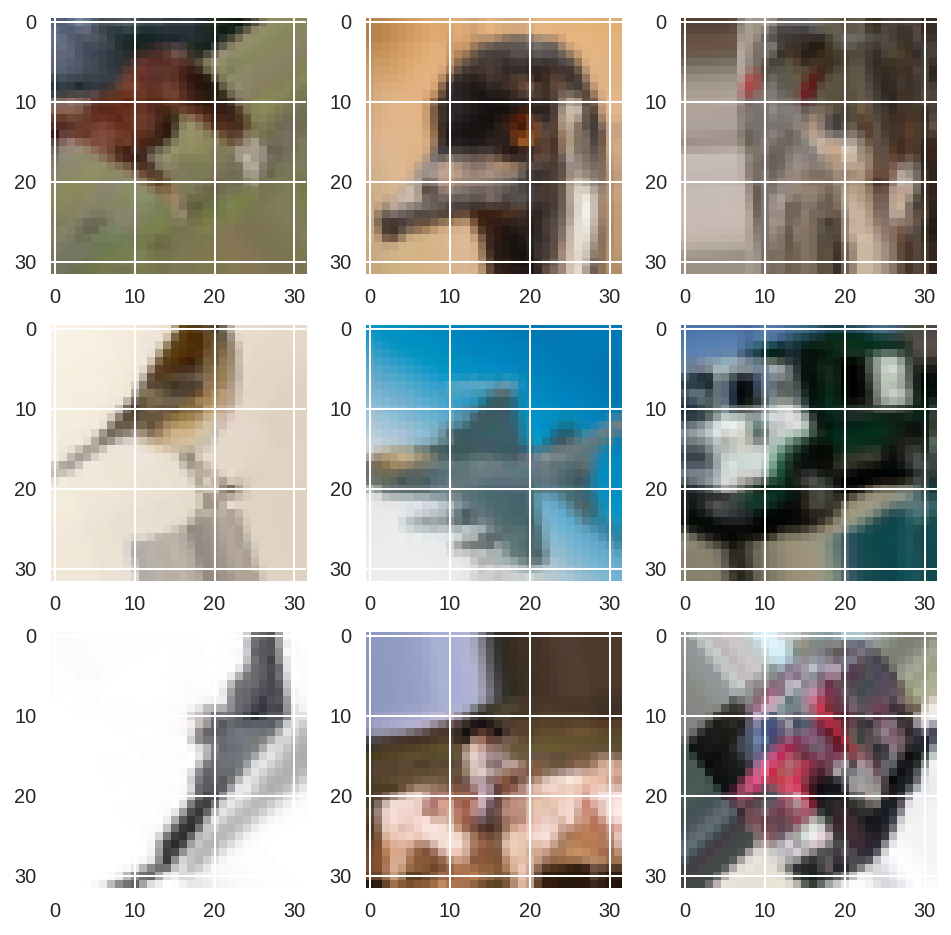

In [24]:
plt.figure(figsize =(8,8))
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # Show the first 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(x_batch[i].reshape(imgRows, imgCols, 3))
    # show the plot
    plt.show()
    break

### Plot model training process

In [0]:
def plot_model_training(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

### Design, Compile, Train model

In [26]:
model = Sequential()
model.add(Convolution2D(32,(3,3), strides = (1, 1),activation = 'relu', input_shape=input_shape))
model.add(BatchNormalization(axis =3))

model.add(Convolution2D(64,(3,3), strides = (1, 1),activation = 'relu'))
model.add(BatchNormalization(axis =3))

model.add(Convolution2D(128,(3,3), strides = (1, 1),activation = 'relu'))
model.add(BatchNormalization(axis =3))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Convolution2D(256, (3,3), activation='relu'))
model.add(BatchNormalization(axis =3))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation ='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 128)       73856     
_________________________________________________________________
batch_normalization_3 (Batch (None, 26, 26, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 128)       0         
__________

In [0]:

#Compilation
model.compile(optimizer = 'nadam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [28]:
#Train & Evaluate Model
history= model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=x_train.shape[0] // batch_size,
                        epochs=epochs,
                        validation_data = (x_test[:5000], y_test[:5000]))

Epoch 1/10
781/781 [==============================] - 64s 82ms/step - loss: 1.8072 - acc: 0.3557 - val_loss: 1.7472 - val_acc: 0.3822
Epoch 2/10
781/781 [==============================] - 60s 77ms/step - loss: 1.4336 - acc: 0.4897 - val_loss: 1.3343 - val_acc: 0.5304
Epoch 3/10
781/781 [==============================] - 60s 76ms/step - loss: 1.3045 - acc: 0.5381 - val_loss: 1.2392 - val_acc: 0.5694
Epoch 4/10
781/781 [==============================] - 59s 76ms/step - loss: 1.2136 - acc: 0.5775 - val_loss: 1.2159 - val_acc: 0.5834
Epoch 5/10
781/781 [==============================] - 59s 76ms/step - loss: 1.1425 - acc: 0.6022 - val_loss: 1.6817 - val_acc: 0.5254
Epoch 6/10
781/781 [==============================] - 65s 83ms/step - loss: 1.0886 - acc: 0.6219 - val_loss: 1.0632 - val_acc: 0.6374
Epoch 7/10
781/781 [==============================] - 67s 86ms/step - loss: 1.0399 - acc: 0.6397 - val_loss: 0.9964 - val_acc: 0.6598
Epoch 8/10
781/781 [==============================] - 66s 85ms

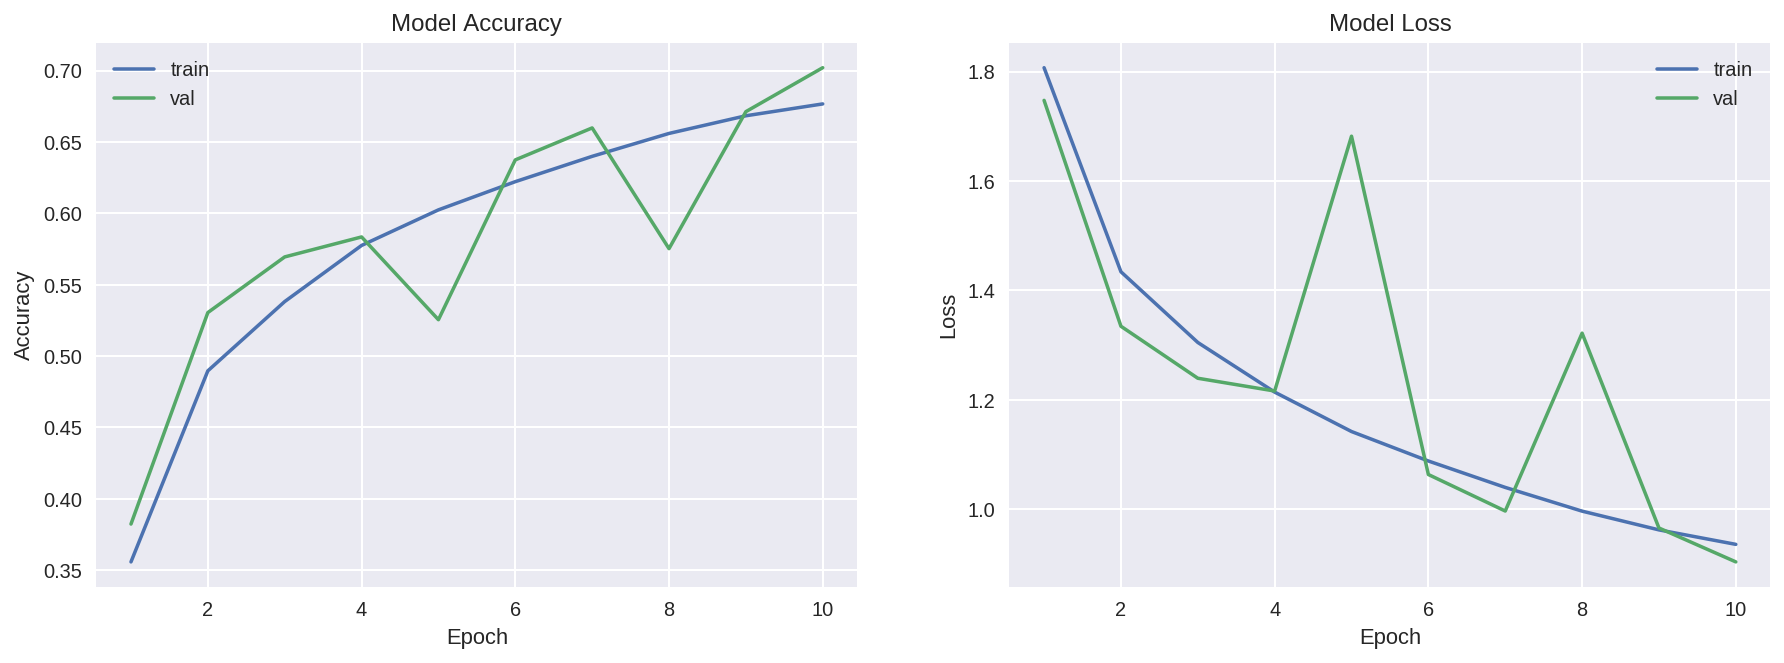

In [29]:
plot_model_training(history)

In [30]:

#evaluate test accuracy#evaluat 
socres,acc = model.evaluate(x_test[5000:],y_test[5000:],
                            batch_size = batch_size,
                            verbose=1)
print('Test Accuracy: %.2f%%' % (acc*100))

5000/5000 [==============================] - 2s 321us/step
Test Accuracy: 70.60%


### Confusion Matrix


0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000


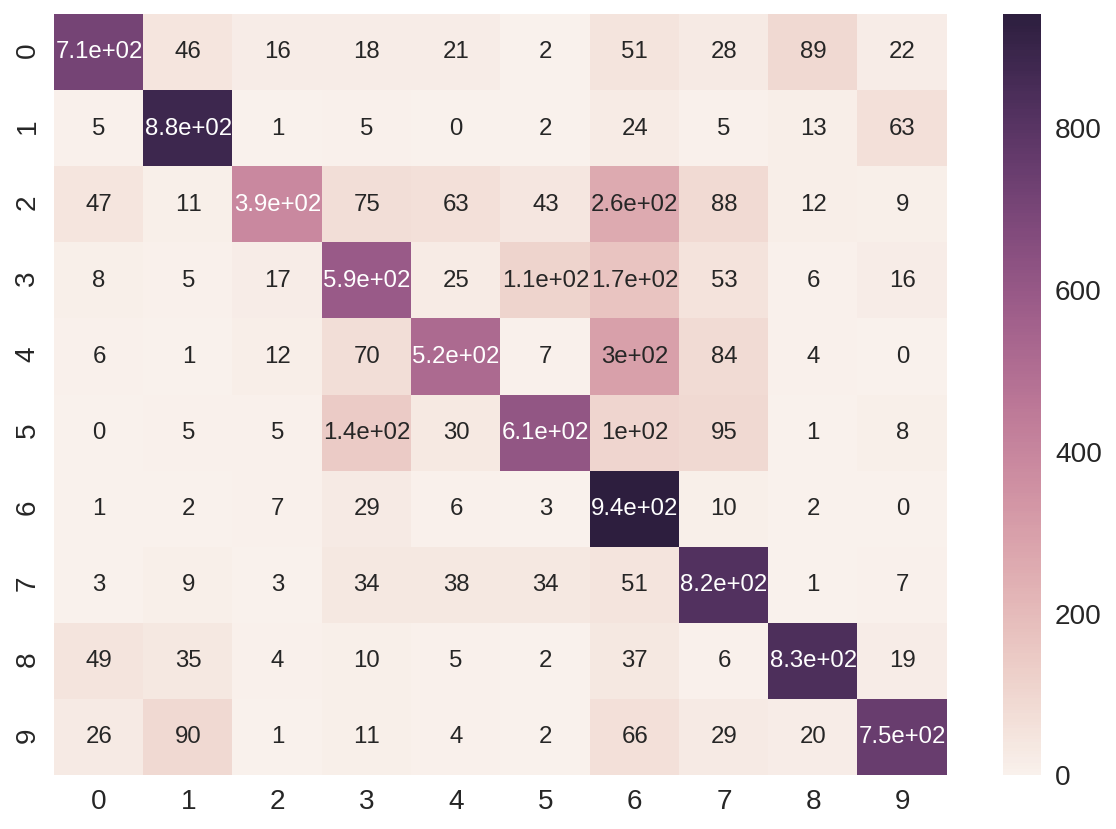

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
#print(cm)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
 
df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

## Transfer Learning

In [5]:
import numpy as np

from keras.models import Sequential, Model
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import backend as K
from keras.preprocessing import image
from keras import applications
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from keras.applications.xception import preprocess_input
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes = True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


### Parameters

In [0]:
batch_size=64
num_classes=2
epochs=3
width,height=256,256
n_train_samples=6000
n_val_samples=1000
n_test_samples=200

based_model_last_block_layer_number = 126

train_dir='data/dogscats/train'
val_dir='data/dogscats/valid'
test_dir='data/dogscats/test1'

 Download data 

In [0]:
! mkdir data && wget http://files.fast.ai/data/dogscats.zip && unzip dogscats.zip -d data

In [17]:
ls data/dogscats/


models/  sample/  test1/  train/  valid/


### Data augmentation

In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

### Pretrained model

In [19]:
model = applications.xception.Xception(include_top = False,
                                     weights ='imagenet',
                                     input_shape = (width, height, 3))

83689472/83683744 [==============================] - 8s 0us/step


### Build a classifier model

In [0]:
x= model.output
x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dense(1024,activation='relu')(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
y_pred=Dense(2, activation='softmax')(x)

In [21]:
final_model=Model(inputs=model.input, outputs=y_pred)
final_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

### Fine tuning

In [0]:
# Unfreeze this layers 
for layers in model.layers[:based_model_last_block_layer_number]:
    layers.trainable=False
    
# Train these layers
for layers in model.layers[based_model_last_block_layer_number:]:
    layers.trainable=True

### Model training

In [29]:

train_generator  = train_datagen.flow_from_directory(train_dir,
                                       target_size = (width, height),
                                       batch_size = batch_size,
                                       class_mode =  "categorical")

validation_generator = test_datagen.flow_from_directory(
                                        val_dir,
                                        target_size= (width, height),
                                        batch_size=batch_size,
                                        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(test_dir,
                                target_size= (width, height),
                                batch_size=batch_size,
                                class_mode= "categorical")

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


###  Compile 

In [0]:
final_model.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

### Train and Save the model

In [0]:
def plot_model_training(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [35]:

checkpoint = ModelCheckpoint(filepath = 'dogscats_xception.h5',
                            verbose = 1,
                            save_best_only = True,
                            monitor = 'val_acc')

early = EarlyStopping(monitor='val_acc', min_delta = 0, patience =5,verbose=1, mode ='auto')

history = final_model.fit_generator(
        train_generator,
        steps_per_epoch = n_train_samples // batch_size,
        epochs= epochs,
        validation_data=validation_generator,
        validation_steps = n_val_samples // batch_size,
        callbacks = [checkpoint,early])

Epoch 1/3
93/93 [==============================] - 156s 2s/step - loss: 0.0711 - acc: 0.9765 - val_loss: 0.0996 - val_acc: 0.9729

Epoch 00001: val_acc improved from -inf to 0.97292, saving model to dogscats_xception.h5
Epoch 2/3
93/93 [==============================] - 162s 2s/step - loss: 0.0669 - acc: 0.9746 - val_loss: 0.0791 - val_acc: 0.9802

Epoch 00002: val_acc improved from 0.97292 to 0.98021, saving model to dogscats_xception.h5
Epoch 3/3
93/93 [==============================] - 177s 2s/step - loss: 0.0732 - acc: 0.9748 - val_loss: 0.0614 - val_acc: 0.9844

Epoch 00003: val_acc improved from 0.98021 to 0.98438, saving model to dogscats_xception.h5


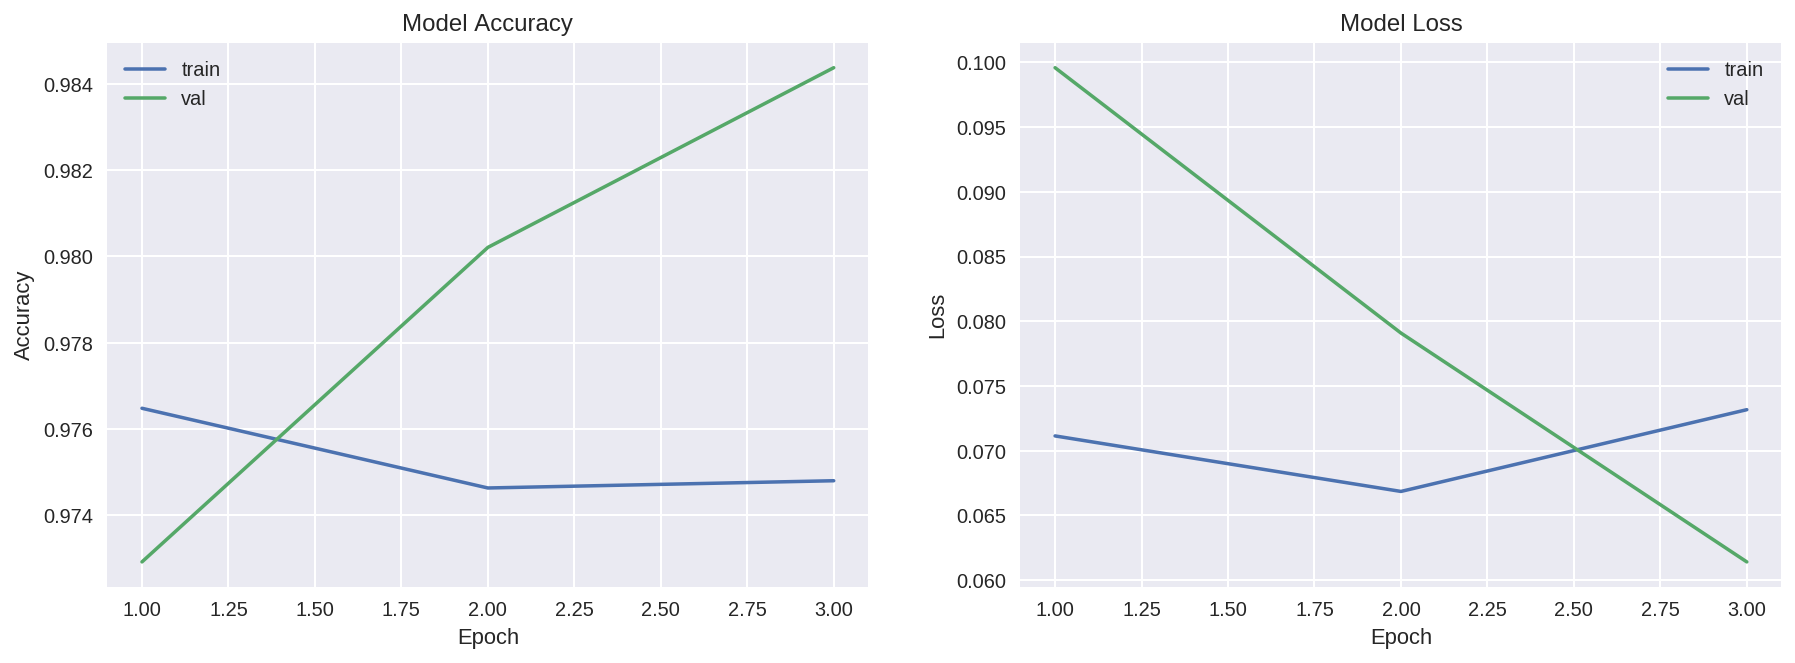

In [36]:
plot_model_training(history)

### Evaluate model

In [0]:
loss,acc= final_model.evaluate_generator(test_generator,steps=100)
print("Accuracy: ", acc*100)